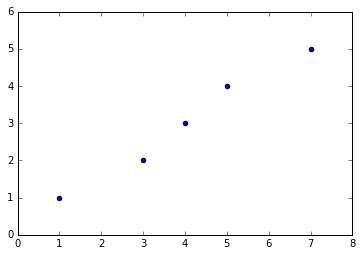

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter([1,3,4,5,7],[1,2,3,4,5])
plt.show()

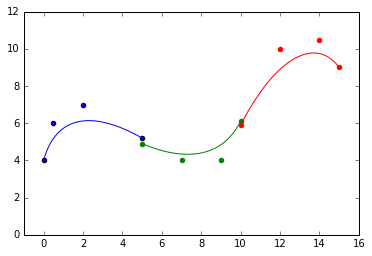

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
import splines
%matplotlib inline

N = 500
p = 3
m = 7
n = m - p - 1


# Perturbation

U1 = np.array([0,0,0,0,5,5,5,5])
P1 = np.array([[0,0.5,2,5],[4,6,7,5.2]])
u1 = np.linspace(U1[0],U1[-1],N)
out = np.zeros((2,N))
for i in xrange(N):
    out[:,i] = splines.curve_point(n,p,U1,P1,u1[i])

plt.scatter(P1[0,:],P1[1,:])
plt.plot(out[0,:],out[1,:])
plt.xlim(-1,16)
plt.ylim(0,12)

U1 = np.array([5,5,5,5,10,10,10,10])
P1 = np.array([[5,7,9,10],[4.9,4.0,4,6.1]])
u1 = np.linspace(U1[0],U1[-1],N)
out = np.zeros((2,N))
for i in xrange(N):
    out[:,i] = splines.curve_point(n,p,U1,P1,u1[i])

plt.scatter(P1[0,:],P1[1,:],color='green')
plt.plot(out[0,:],out[1,:])
plt.xlim(-1,16)
plt.ylim(0,12)

U1 = np.array([10,10,10,10,15,15,15,15])
P1 = np.array([[10,12,14,15],[5.9,10,10.5,9]])
u1 = np.linspace(U1[0],U1[-1],N)
out = np.zeros((2,N))
for i in xrange(N):
    out[:,i] = splines.curve_point(n,p,U1,P1,u1[i])

plt.scatter(P1[0,:],P1[1,:],color='red')
plt.plot(out[0,:],out[1,:])
plt.xlim(-1,16)
plt.ylim(0,12)

plt.savefig('bezierprojectionperturbed.png',dpi=500)

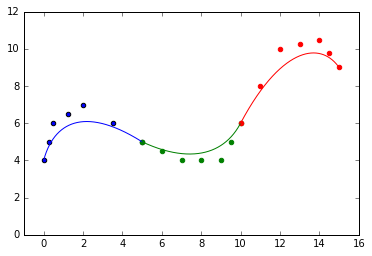

In [5]:

U1 = np.array([0,0,0,0,5,5,5,5])
P1 = np.array([[0,0.5,2,5],[4,6,7,5]])
u1 = np.linspace(U1[0],U1[-1],N)
out = np.zeros((2,N))
for i in xrange(N):
    out[:,i] = splines.curve_point(n,p,U1,P1,u1[i])

plt.scatter(P1[0,:],P1[1,:])
plt.scatter(np.array([0.25,1.25,3.5]),np.array([5,6.5,6]))
plt.plot(out[0,:],out[1,:])
plt.xlim(-1,16)
plt.ylim(0,12)

U1 = np.array([5,5,5,5,10,10,10,10])
P1 = np.array([[5,7,9,10],[5,4.0,4,6]])
u1 = np.linspace(U1[0],U1[-1],N)
out = np.zeros((2,N))
for i in xrange(N):
    out[:,i] = splines.curve_point(n,p,U1,P1,u1[i])

plt.scatter(P1[0,:],P1[1,:],color='green')
plt.scatter([6,8,9.5],[4.5,4.0,5],color='green')
plt.plot(out[0,:],out[1,:])
plt.xlim(-1,16)
plt.ylim(0,12)

U1 = np.array([10,10,10,10,15,15,15,15])
P1 = np.array([[10,12,14,15],[6,10,10.5,9]])
u1 = np.linspace(U1[0],U1[-1],N)
out = np.zeros((2,N))
for i in xrange(N):
    out[:,i] = splines.curve_point(n,p,U1,P1,u1[i])

plt.scatter(P1[0,:],P1[1,:],color='red')
plt.scatter([11,13,14.5],[8,10.25,9.75],color='red')
plt.plot(out[0,:],out[1,:])
plt.xlim(-1,16)
plt.ylim(0,12)

plt.savefig('bezierprojectiondemo.png',dpi=500)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
import splines
%matplotlib inline

p = 3
N = 1000
U = np.array([0,0,0,0,1,2,3,4,4,4,4])
m = len(U) - 1
n = m - p - 1
x = np.linspace(0,4,N)
P = np.array([[0,0.5,1,1.1,1.9,3,3.5],\
              [4,3.8,2,0.1,1,7,6]])
for j in xrange(n+1):
    y = np.zeros(N)
    for i in xrange(N):
        y[i] = splines.one_basis_func(p,m,U,j,x[i])
    plt.plot(x,y)
plt.savefig('Bspline_basis_funcs.png')

splines.plot_spline(n,p,U,P,N,save_img=True,filename='Bspline2017.png')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def fn(x,n):
    if n == 0:
        return 1/3.
    else:
        if x <= 1/3.:
            return 2/3. + 1/3.*fn(3*x,n-1)
        elif x >= 2/3.:
            return x-2/3.
        else:
            return 7/3.*(2/3.-x)

n = 100000
x = np.linspace(0,1,n)

f = 1/3.0*np.ones(n)

for i in xrange(4):
    plt.subplot(4,2,i+1)
    plt.plot(x,f)
    plt.title('f_%s'%i)
    plt.ylim([0,1])
    y = np.array([1/27.,25/27.,7/27.,19/27.])
    fy = np.zeros(4)
    for j in xrange(4):
        fy[j] = fn(y[j],i)
    plt.scatter(y,fy)
    
    temp = np.zeros(n)
    temp[:int(n/3)] = 2/3. + 1/3.*f[:-1:3]
    temp[int(n/3):2*int(n/3)] = (2/3.-x[int(n/3):2*int(n/3)])*(2+f[-1])
    temp[2*int(n/3):] = x[2*int(n/3):] - 0.666
    f = temp

plt.tight_layout()
plt.savefig('doublemap.png')

In [ ]:
import numpy as np

A = np.array([[1,1],[0,1]])
B = np.array([[1,1,1],[0,1,1],[0,0,1]])
C = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,0,0,1,1],[0,0,0,1,1]])

A_temp = A
for i in xrange(2,10):
    A_temp = np.dot(A_temp,A)
    print A_temp
    
B_temp = B
for i in xrange(2,10):
    B_temp = np.dot(B_temp,B)
    print B_temp

C_temp = C
for i in xrange(2,10):
    C_temp = np.dot(C_temp,C)
    print C_temp

In [ ]:
from __future__ import division
import numpy as np

def diff(x,y):
    a, b = x/max(x,y), y/max(x,y)
    print 1 - np.abs(a-b)
    
diff(190, 200)

In [ ]:
from __future__ import division
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

data_xvals = np.array([1.0,3.0,5.0,6.0,7.0,8.0])
data_yvals = np.sin(data_xvals)

sig2 = 0.1

def k_lin(x,y,noisy=False):
    if noisy and x==y:
        return x*y + sig2
    return x*y

def k_poly(x,y,noisy=False):
    deg = 3
    if noisy and x==y:
        return (1.0+x*y)**deg + sig2
    return (1.0+x*y)**deg

def k_gauss(x,y,noisy=False):
    # Is there supposed to be a -0.5 inside the exp?
    if noisy and x==y:
        return 1.0 + sig2
    return np.exp(-0.5*(x-y)**2)

# Calculate the kernel matrices
K_lin = np.zeros((6,6))
K_poly = np.zeros((6,6))
K_gauss = np.zeros((6,6))

for i in xrange(6):
    for j in xrange(6):
        K_lin[i,j] = k_lin(data_xvals[i],data_xvals[j])
        K_poly[i,j] = k_poly(data_xvals[i],data_xvals[j])
        K_gauss[i,j] = k_gauss(data_xvals[i],data_xvals[j])
    
print K_lin
print K_poly
print K_gauss

In [ ]:
import numpy as np

data_xvals = np.array([1.0,3.0,5.0,6.0,7.0,8.0])
k = np.zeros((6,6))
for i in xrange(6):
    for j in xrange(6):
        k[i,j] = data_xvals[i]*data_xvals[j]
print k

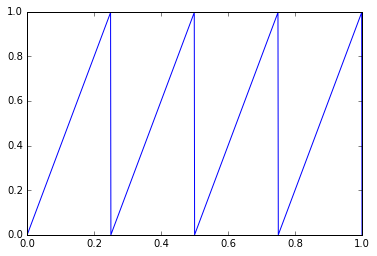

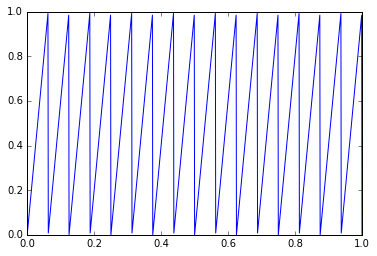

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def Em(x,m):
    return m*x % 1.0

def Em_inv(x,m):
    return x/m

m = 4
d = np.linspace(0,1,1001)
plt.plot(d,Em(d,m))
plt.show()
plt.plot(d,Em(Em(d,m),m))
plt.show()

In [ ]:
import numpy as np

f = lambda x:x**2+1
fprime = lambda x:2*x

x = 1.0-1j
for i in xrange(10):
    print x
    x = x - f(x)/fprime(x)
print x

In [ ]:
num = 17
for i in xrange(50):
    num = num*17 % 1000
    print num

In [ ]:
import csv
import decimal
import itertools
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

def lookuptable(n):
    primebools = np.array([True for i in xrange(n)])
    primebools[0] = False
    primebools[1] = False
    done = int(np.floor(np.sqrt(n)))+1
    for i in xrange(2,done):
        primebools[2*i::i] = False
    primes = np.array(np.where(primebools == True))[0]
    return primes

#primes = lookuptable(10000)
#setprimes = set(primes)
#first_four = 168

def checkprob(n):
    primes = lookuptable(n)
    setprimes = set(primes)
    setprimes.add(1)
    to_check = np.array([False for i in xrange(n)])
    for x in xrange(n):
        val = x
        a = 0
        if x in setprimes:
            to_check[x] = True
        while val not in setprimes and val >= 0:
            val = x - a**2
            if val in setprimes or val == 0:
                to_check[x] = True
            a += 1

    return to_check

print np.where(checkprob(100) == False)